# Mie Performance and Jitting

**Scott Prahl**

**Apr 2021**

*If miepython is not installed, uncomment the following cell (i.e., delete the #) and run (shift-enter)*

In [1]:
#!pip install --user miepython

In [2]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import miepython.miepython as miepython_jit
    import miepython.miepython_nojit as miepython

except ModuleNotFoundError:
    print('miepython not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')

## Size Parameters

We will use `%timeit` to see speeds for unjitted code, then jitted code

82.6 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
779 µs ± 62.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.41 ms ± 387 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.9 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
70.6 ms ± 3.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
271 ms ± 41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.4 µs ± 574 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
17 µs ± 948 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
55.7 µs ± 2.83 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
214 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
821 µs ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.09 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


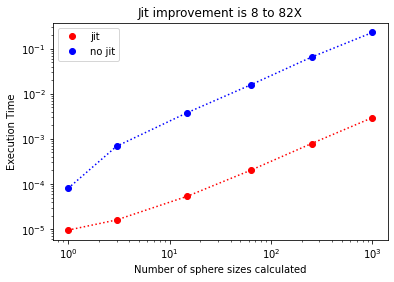

In [3]:
ntests=6

m=1.5
N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    x = np.linspace(0.1,20,N[i]) 
    a = %timeit -o qext, qsca, qback, g = miepython.mie(m,x)
    result[i]=a.best

for i in range(ntests):
    x = np.linspace(0.1,20,N[i]) 
    a = %timeit -o qext, qsca, qback, g = miepython_jit.mie(m,x)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of sphere sizes calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Embedded spheres

282 µs ± 31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
719 µs ± 72.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.06 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.7 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
50.4 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
203 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.3 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
17.2 µs ± 401 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
59.6 µs ± 2.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
217 µs ± 4.85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
828 µs ± 21.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.2 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


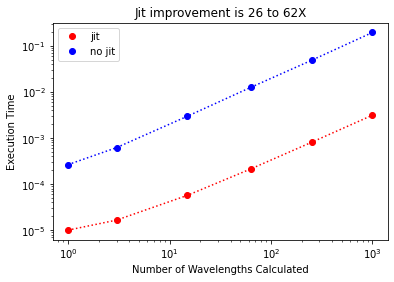

In [4]:
ntests = 6
mwater = 4/3   # rough approximation
m=1.0
mm = m/mwater
r=500                            # nm

N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    xx = 2*np.pi*r*mwater/lambda0
    a = %timeit -o qext, qsca, qback, g = miepython.mie(mm,xx)
    result[i]=a.best

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    xx = 2*np.pi*r*mwater/lambda0
    a = %timeit -o qext, qsca, qback, g = miepython_jit.mie(mm,xx)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Wavelengths Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Testing `ez_mie`

Another high level function that should be sped up by jitting.

290 µs ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
644 µs ± 29.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.09 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.3 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
52.4 ms ± 2.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
202 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
14.6 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
22.2 µs ± 3.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
62.7 µs ± 5.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
217 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
817 µs ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.23 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


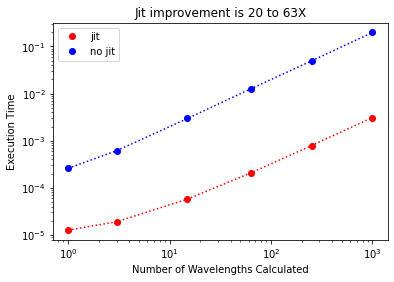

In [5]:
ntests=6
m_sphere = 1.0
n_water  = 4/3
d = 1000                        # nm
N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    a = %timeit -o qext, qsca, qback, g = miepython.ez_mie(m_sphere, d, lambda0, n_water)
    result[i]=a.best

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    a = %timeit -o qext, qsca, qback, g = miepython_jit.ez_mie(m_sphere, d, lambda0, n_water)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Wavelengths Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Scattering Phase Function

131 µs ± 9.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
251 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
988 µs ± 8.34 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.86 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.5 ms ± 507 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
71.5 ms ± 6.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.85 µs ± 280 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.64 µs ± 103 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.76 µs ± 143 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.96 µs ± 175 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
24.8 µs ± 737 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
97.8 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


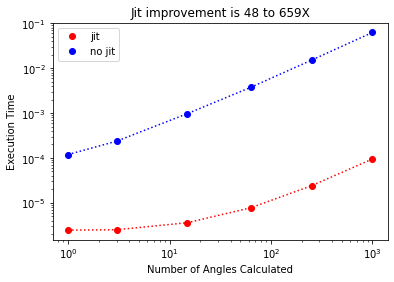

In [6]:
ntests = 6
m = 1.5
x = np.pi/3

N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    theta = np.linspace(-180,180,N[i])
    mu = np.cos(theta/180*np.pi)
    a = %timeit -o s1, s2 = miepython.mie_S1_S2(m,x,mu)
    result[i]=a.best

for i in range(ntests):
    theta = np.linspace(-180,180,N[i])
    mu = np.cos(theta/180*np.pi)
    a = %timeit -o s1, s2 = miepython_jit.mie_S1_S2(m,x,mu)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Angles Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## And finally, as function of sphere size

3.14 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.27 ms ± 501 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15 ms ± 441 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
49.3 ms ± 3.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
152 ms ± 8.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
562 ms ± 18.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7 µs ± 186 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.8 µs ± 215 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
22.8 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
65.4 µs ± 3.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
216 µs ± 8.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
794 µs ± 17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


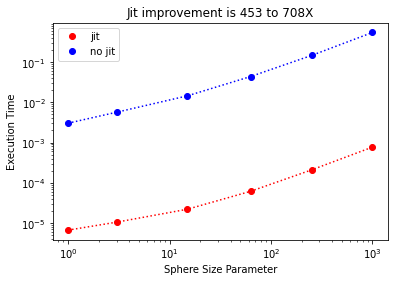

In [7]:
ntests=6
m = 1.5-0.1j
x = np.logspace(0,3,ntests)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

theta = np.linspace(-180,180)
mu = np.cos(theta/180*np.pi)

for i in range(ntests):
    a = %timeit -o s1, s2 = miepython.mie_S1_S2(m,x[i],mu)
    result[i]=a.best

for i in range(ntests):
    a = %timeit -o s1, s2 = miepython_jit.mie_S1_S2(m,x[i],mu)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Sphere Size Parameter")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()